In [41]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [16]:
print(x.shape, y.shape)

(70000, 784) (70000,)


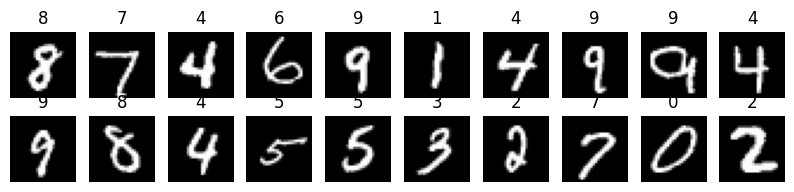

In [31]:
indices = np.random.randint(0, 70000, 20)

plt.figure(figsize=(10,2))
for i, idx in enumerate(indices):
    plt.subplot(2,10,i+1)
    plt.imshow(x[idx].reshape(28,28), cmap="gray")
    plt.title(y[idx])
    plt.axis("off")
plt.show()

In [36]:
np.isnan(x).sum()

np.int64(0)

In [56]:
y.shape[0] - y.shape[0]*.15, y.shape[0]*.15

(59500.0, 10500.0)

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= .15, random_state = 42)

In [55]:
ytrain.shape

(59500,)

In [94]:
pca = PCA(n_components= 500)

In [95]:
xtrainpca = pca.fit_transform(xtrain)

In [96]:
pca.explained_variance_ratio_.sum()

np.float64(0.9992607027068305)

In [136]:
pcaPipe = Pipeline([('prep', StandardScaler()), ('model', PCA())])
pcaPipe.fit(xtrain)
objasnjenaVar1 = pcaPipe['model'].explained_variance_ratio_
np.argmax(np.cumsum(objasnjenaVar1) >= .95)
### PRVIH 329 GLANIH KOMPONENTI OBJASNJAVA 95% VARIJACIJE

np.int64(329)

In [137]:
pca1 = PCA(n_components= np.argmax(np.cumsum(objasnjenaVar1) >= .95))
xtrainpca1 = pca1.fit_transform(xtrain)
xtrainInvers1 = pca1.inverse_transform(xtrainpca)

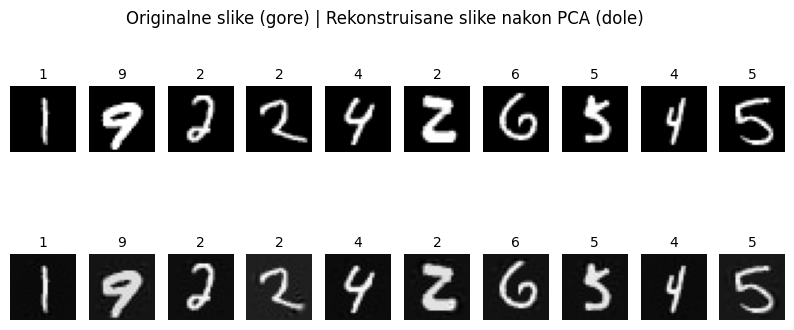

In [138]:
indices = np.random.randint(0, xtrain.shape[0], 10)

plt.figure(figsize=(10, 4))

for i, idx in enumerate(indices):
    # Originalna slika
    plt.subplot(2, 10, i + 1)
    plt.imshow(xtrain[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

    # Rekonstruisana slika nakon PCA inverzne transformacije
    plt.subplot(2, 10, i + 11)
    plt.imshow(xtrainInvers[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

plt.suptitle("Originalne slike (gore) | Rekonstruisane slike nakon PCA (dole)", fontsize=12)
plt.show()

In [135]:
pca = PCA()
pca.fit(xtrain)
objasnjenaVar = pca.explained_variance_ratio_
np.argmax(np.cumsum(objasnjenaVar) >= .95)

np.int64(153)

In [139]:
pca = PCA(n_components= np.argmax(np.cumsum(objasnjenaVar) >= .95))
xtrainpca = pca.fit_transform(xtrain)
xtrainInvers = pca.inverse_transform(xtrainpca)

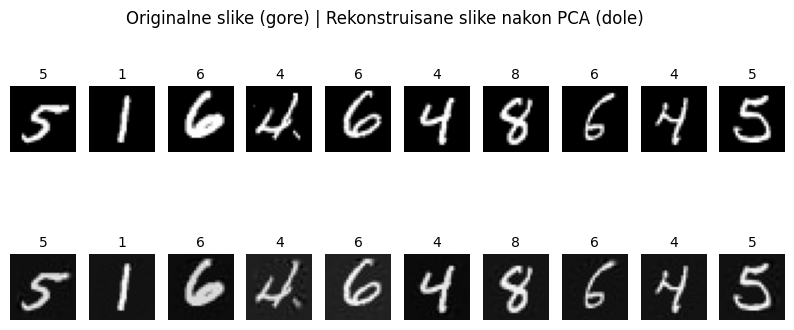

In [140]:
indices = np.random.randint(0, xtrain.shape[0], 10)

plt.figure(figsize=(10, 4))

for i, idx in enumerate(indices):
    # Originalna slika
    plt.subplot(2, 10, i + 1)
    plt.imshow(xtrain[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

    # Rekonstruisana slika nakon PCA inverzne transformacije
    plt.subplot(2, 10, i + 11)
    plt.imshow(xtrainInvers[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

plt.suptitle("Originalne slike (gore) | Rekonstruisane slike nakon PCA (dole)", fontsize=12)
plt.show()

In [99]:
np.cumsum(objasnjenaVar[:np.argmax(np.cumsum(objasnjenaVar) >= .95)])[-1]
### PROVERA

np.float64(0.9499183843120547)

In [101]:
pca = PCA(n_components= np.argmax(np.cumsum(objasnjenaVar) >= .95))
xtrainpca = pca.fit_transform(xtrain)

In [104]:
pca.explained_variance_ratio_.sum()

np.float64(0.9499183843120542)

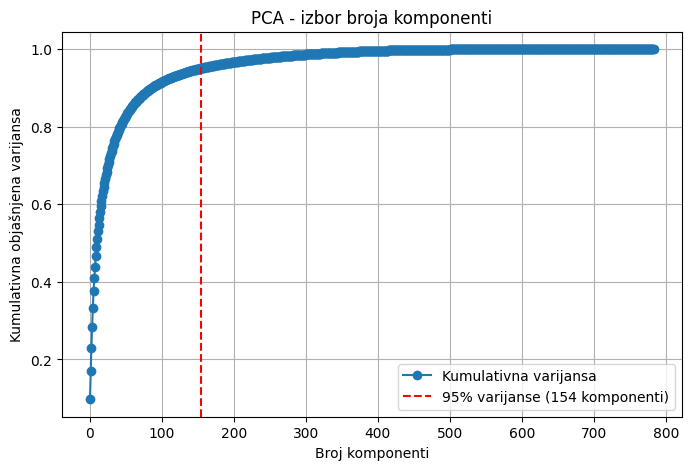

In [112]:
optimalanBrojKomponenti = np.argmax(np.cumsum(objasnjenaVar) >= 0.95) + 1  # Dodajemo +1 jer np.argmax vraća indeks (indeksi počinju od 0)
# Vizualizacija varijanse po komponentama
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(objasnjenaVar), marker='o', linestyle='-', label="Kumulativna varijansa")

# Obeležava tačku gde dostižemo 95% varijanse
plt.axvline(optimalanBrojKomponenti, color='r', linestyle='--', 
            label=f'95% varijanse ({optimalanBrojKomponenti} komponenti)')

plt.xlabel("Broj komponenti")
plt.ylabel("Kumulativna objašnjena varijansa")
plt.legend()
plt.title("PCA - izbor broja komponenti")
plt.grid()
plt.show()

In [119]:
xtrainInvers = pca.inverse_transform(xtrainpca)

In [120]:
xtrainpca.shape, xtrainInvers.shape

((59500, 153), (59500, 784))

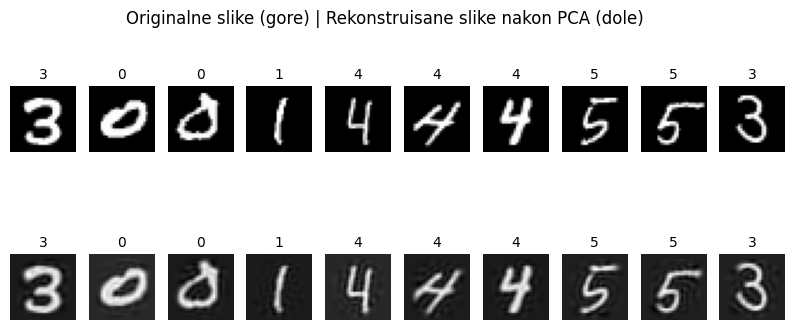

In [125]:
indices = np.random.randint(0, xtrain.shape[0], 10)

plt.figure(figsize=(10, 4))

for i, idx in enumerate(indices):
    # Originalna slika
    plt.subplot(2, 10, i + 1)
    plt.imshow(xtrain[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

    # Rekonstruisana slika nakon PCA inverzne transformacije
    plt.subplot(2, 10, i + 11)
    plt.imshow(xtrainInvers[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

plt.suptitle("Originalne slike (gore) | Rekonstruisane slike nakon PCA (dole)", fontsize=12)
plt.show()